In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
!ls

CSE151Arepoairlinegrp flights.csv           milestone 2.ipynb
README.md             flights.csv.zip


In [35]:
!unzip flights.csv.zip

Archive:  flights.csv.zip
  inflating: flights.csv             


In [36]:
df = pd.read_csv('flights.csv')

In [37]:
df.head()

id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1     517.0             515        2.0     830.0   
1   1  2013      1    1     533.0             529        4.0     850.0   
2   2  2013      1    1     542.0             540        2.0     923.0   
3   3  2013      1    1     544.0             545       -1.0    1004.0   
4   4  2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute            time_hour                    name  
0      1400     5      15  2013-01-01 05:00:00   United Air Lines Inc.  
1      1416     5      29  2013-01-01 05:00:00   United Air Lines Inc.  
2      1089     5      40  2013-01-01 05:00:00  American Airlines Inc.  
3      1576     5      45  2013-01-01 05:00:00         JetBlue Airways  
4       762     6       0  2013-01-01 06:00:00    Delta Air Lines Inc.  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

In [5]:
# id: A unique identifier for each flight record in the dataset.
# month: The month in which the flight took place (1 to 12).
# day: The day of the month on which the flight took place (1 to 31).
# dep_time: The actual local departure time of the flight, in 24-hour format (hhmm).
# sched_dep_time: The scheduled local departure time of the flight, in 24-hour format (hhmm).
# dep_delay: The difference between the actual and scheduled departure times of the flight, in minutes. A positive value indicates a delayed departure, while a negative value indicates an early departure.
# arr_time: The actual local arrival time of the flight, in 24-hour format (hhmm).
# sched_arr_time: The scheduled local arrival time of the flight, in 24-hour format (hhmm).
# arr_delay: The difference between the actual and scheduled arrival times of the flight, in minutes. A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
# carrier: The two-letter code of the airline carrier for the flight.
# flight: The flight number of the flight.
# tailnum: The unique identifier of the aircraft used for the flight.
# origin: The three-letter code of the airport of origin for the flight.
# dest: The three-letter code of the destination airport for the flight.
# air_time: The duration of the flight, in minutes.
# distance: The distance between the origin and destination airports, in miles.

In [6]:
df['year'].unique()

array([2013])

In [7]:
df=df.drop(columns=['year', 'name', 'hour', 'minute', 'time_hour'])

In [8]:
df.isna().sum()

id                   0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
dtype: int64

In [9]:
df = df.dropna(subset=['dep_time', 'arr_time', 'arr_delay', 'air_time'])

In [10]:
df.isna().sum()

id                0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
dtype: int64

In [11]:
df.dtypes

id                  int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [12]:
df['dep_time'] = df['dep_time'].astype(int)
df['dep_delay'] = df['dep_delay'].astype(int)
df['arr_time'] = df['arr_time'].astype(int)
df['dep_time'] = df['dep_time'].astype(int)
df['arr_delay'] = df['arr_delay'].astype(int)
df['air_time'] = df['air_time'].astype(int)

In [13]:
df.dtypes

id                 int64
month              int64
day                int64
dep_time           int64
sched_dep_time     int64
dep_delay          int64
arr_time           int64
sched_arr_time     int64
arr_delay          int64
carrier           object
flight             int64
tailnum           object
origin            object
dest              object
air_time           int64
distance           int64
dtype: object

In [14]:
df.shape

(327346, 16)

In [15]:
df.columns

Index(['id', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance'],
      dtype='object')

In [16]:
df['month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9])

In [17]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [18]:
len(df['dep_time'].unique())

1317

In [19]:
len(df['sched_dep_time'].unique())

1020

In [20]:
df['dep_delay'].describe()

count    327346.000000
mean         12.555156
std          40.065688
min         -43.000000
25%          -5.000000
50%          -2.000000
75%          11.000000
max        1301.000000
Name: dep_delay, dtype: float64

In [21]:
len(df['arr_time'].unique())

1410

In [22]:
len(df['sched_arr_time'].unique())

1162

In [23]:
df['arr_delay'].describe()

count    327346.000000
mean          6.895377
std          44.633292
min         -86.000000
25%         -17.000000
50%          -5.000000
75%          14.000000
max        1272.000000
Name: arr_delay, dtype: float64

In [24]:
df['carrier'].unique()

array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

In [25]:
len(df['flight'].unique())

3835

In [26]:
len(df['tailnum'].unique())

4037

In [27]:
df['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [28]:
df['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TYS', 'PVD', 'DSM', 'PSE', 'TUL', 'BHM', 'OKC', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC'], dtype=object)

In [29]:
df['air_time'].describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

In [30]:
df['distance'].describe()

count    327346.000000
mean       1048.371314
std         735.908523
min          80.000000
25%         509.000000
50%         888.000000
75%        1389.000000
max        4983.000000
Name: distance, dtype: float64

KeyboardInterrupt: 

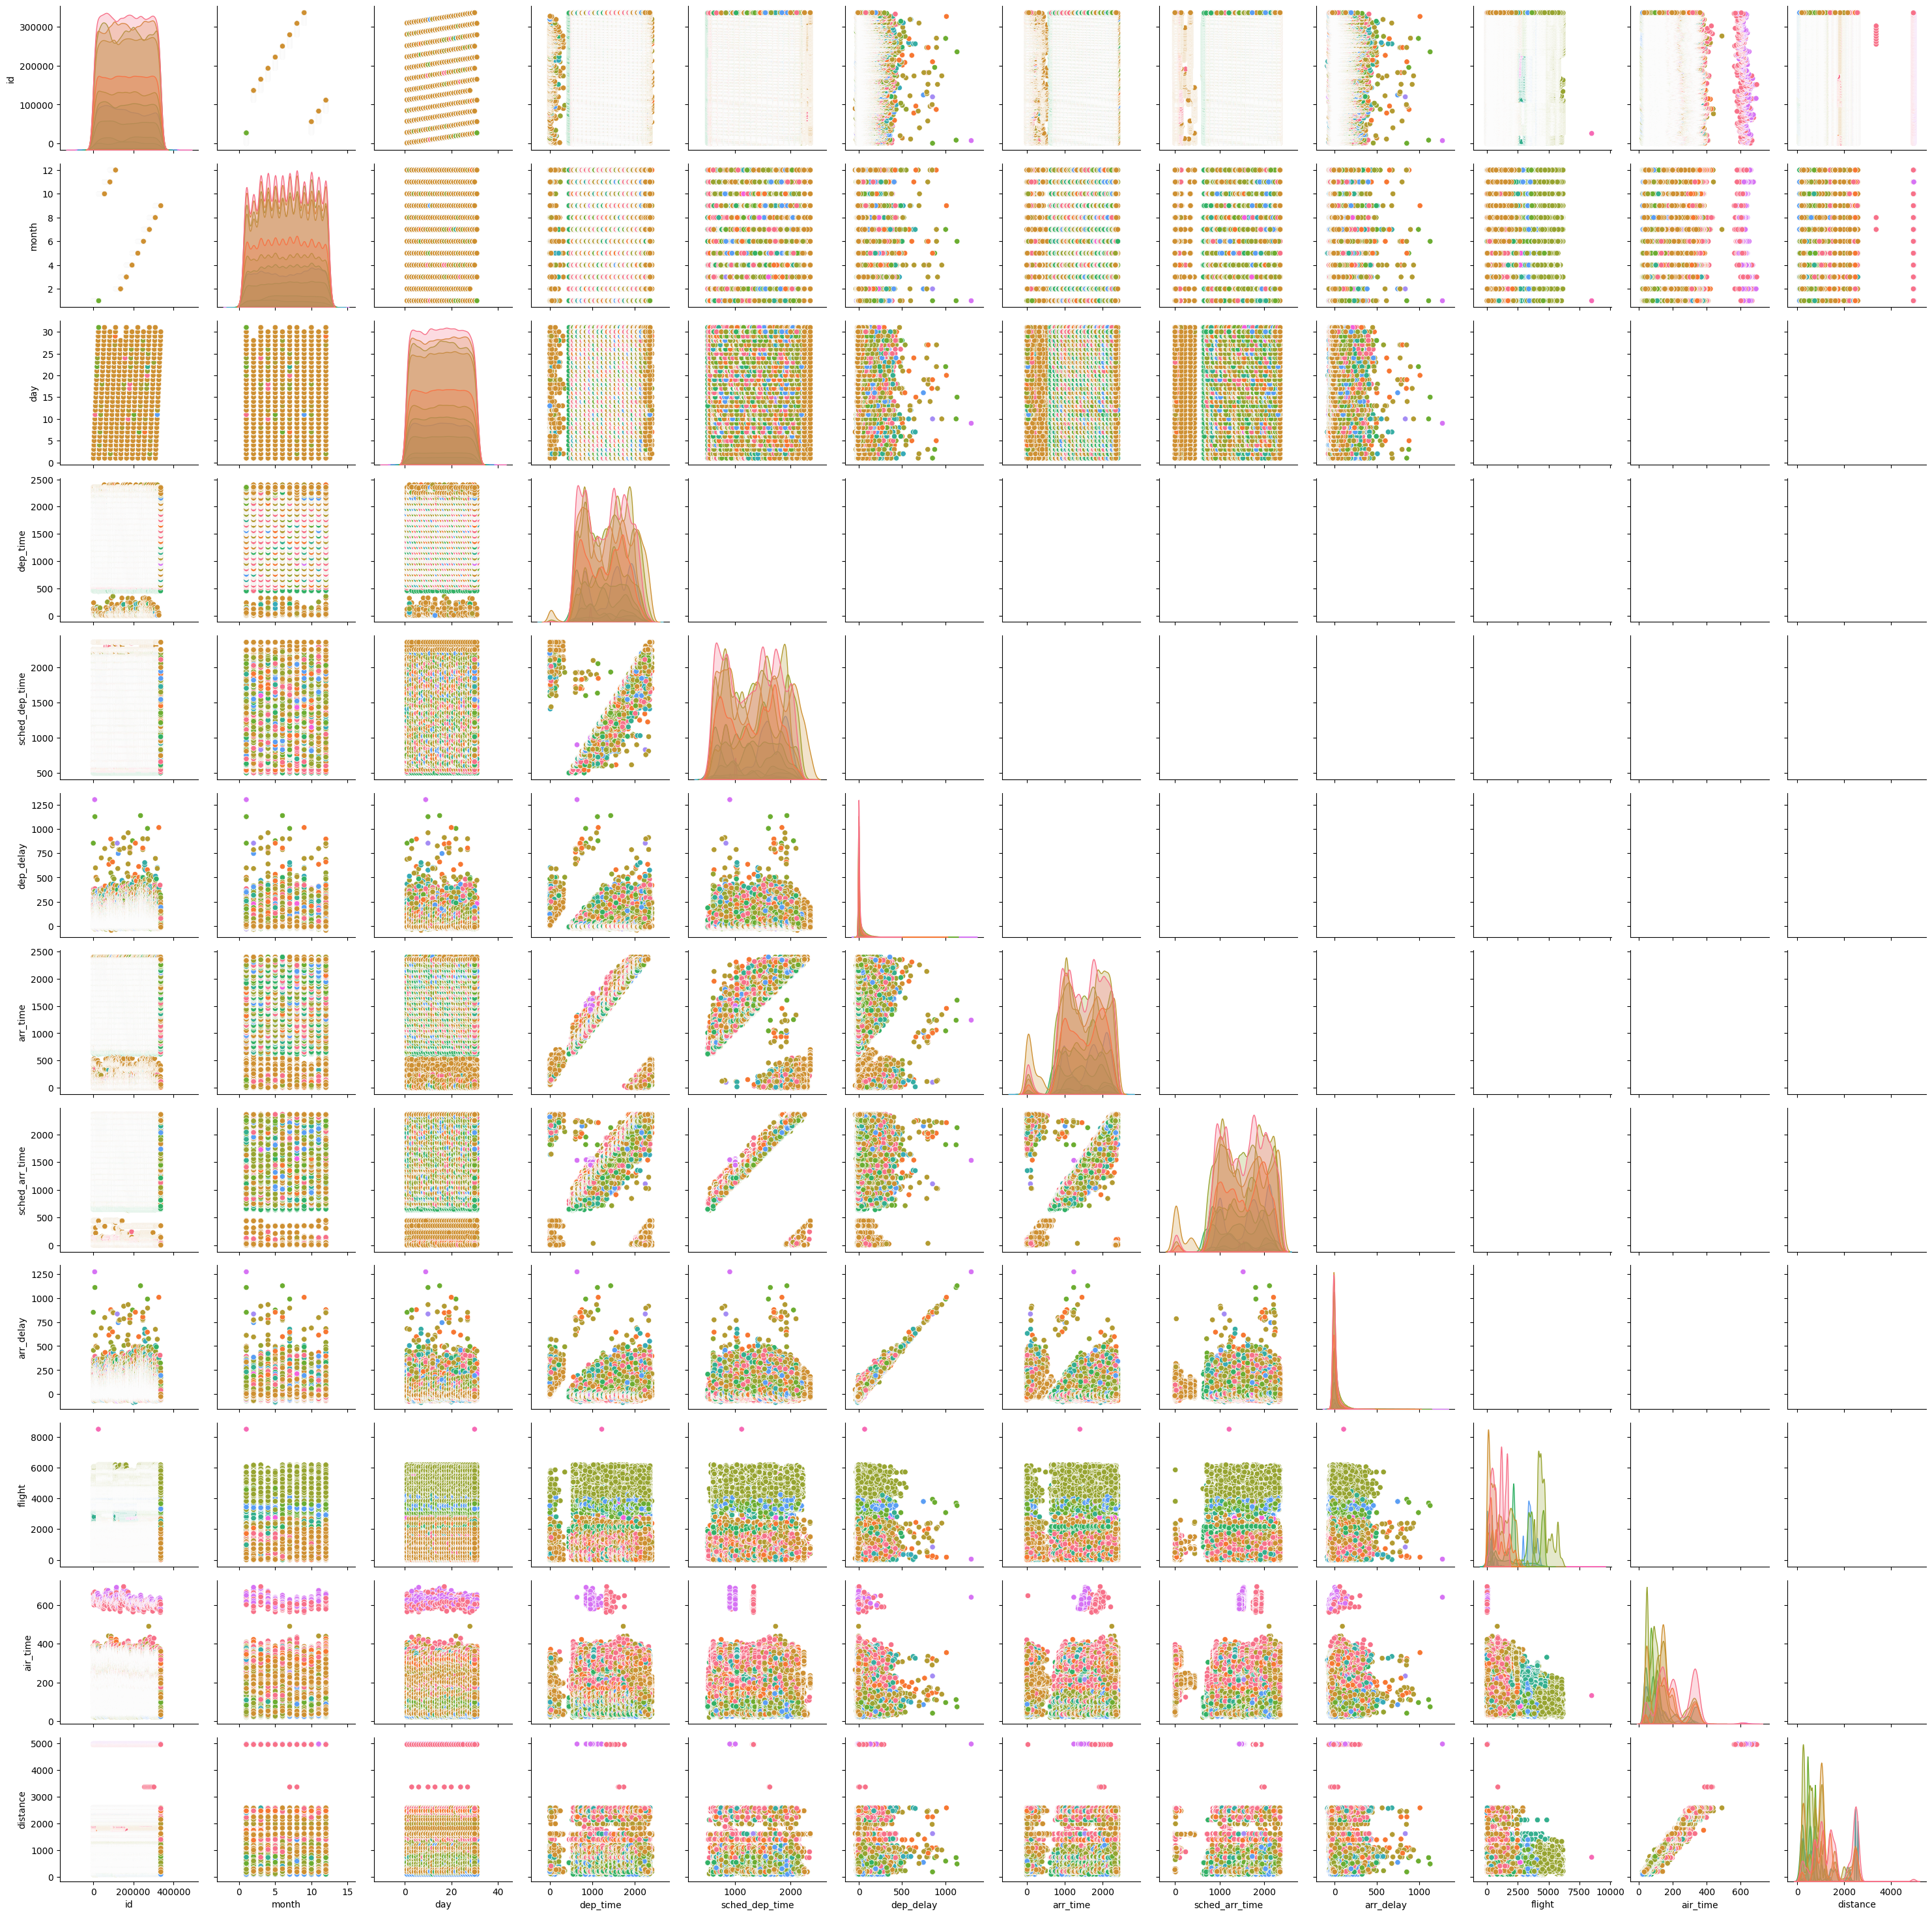

In [31]:
# plot_df = df.drop(columns=[])
sns.pairplot(df, hue='carrier')
plt.show()

# plt.title('Distance vs. Arrival Delay')
# plt.scatter(df['distance'], df['arr_delay'])
# plt.show()

# plt.title('Month vs. Arrival Delay')
# plt.scatter(df['month'], df['arr_delay'])
# plt.show()

# plt.hist(df['carrier'])
# plt.show()

In [ ]:
sns.pairplot(df, hue='origin')
plt.show()

In [ ]:
sns.pairplot(df, hue='dest')
plt.show()